Escribir el siguiente comando en la terminal para instalar las librerías necesarias: 

*pip install -r requirements.txt*

In [222]:
# pip install -r requirements.txt

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## 1. Selección de una serie temporal económica

Seleccionar una serie económica (stock Price, bitcoin, tasa de cambio etc..), que muestre un comportamiento parecido a una “caminata aleatoria”. Los datos deben estar actualizados hasta el 31/03/2024

In [224]:
# Cargar datos de google finance
df = yf.download('AMZN', start='2020-01-01', end='2024-03-31') 
df.head(5) # Visualizar las primeras 5 filas

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


In [225]:
df.tail(5) # Visualizar las últimas 5 filas

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600


Los datos están disponibles hasta el 2024-03-28 (yyyy-mm-dd)

In [226]:
df.shape # Dimensiones del dataframe

(1067, 6)

In [227]:
df2 = df[["Adj Close"]] # Seleccionar solo la columna de precios de cierre ajustados
df2.head(5)

,Adj Close
Date,
2020-01-02,94.900497
2020-01-03,93.748497
2020-01-06,95.143997
2020-01-07,95.343002
2020-01-08,94.598503


In [228]:
df2.tail(5) # Visualizar las últimas 5 filas

,Adj Close
Date,
2024-03-22,178.869995
2024-03-25,179.710007
2024-03-26,178.300003
2024-03-27,179.830002
2024-03-28,180.380005


<Axes: title={'center': 'Amazon Adjusted Stock Price'}, xlabel='Date'>

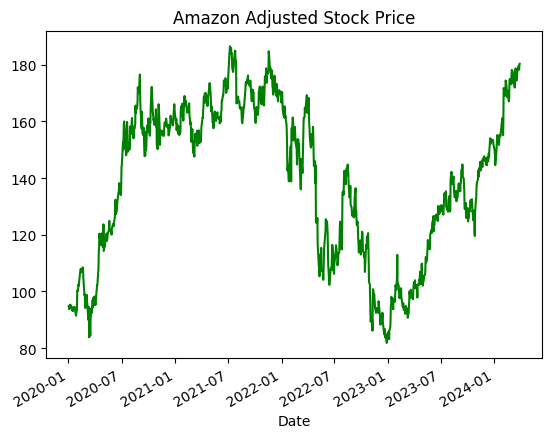

In [229]:
df2["Adj Close"].plot(title = "Amazon Adjusted Stock Price", color = "green")

Hurst exponent (H) is a measure for the long-term memory of a time series, that is, it measures the amount by which that series deviates from a random walk. The values of the Hurst exponent range between 0 and 1, with the following interpretation:

* H < 0.5—a series is mean-reverting. The closer the value is to 0, the stronger the mean-reversion process is. 
* H = 0.5—a series is a geometric random walk. 
* H > 0.5—a series is trending. The closer the value is to 1, the stronger the trend. 

There are a few ways of calculating the Hurst exponent. In this recipe, we will focus on the one based on estimating the rate of the diffusive behavior, which is based on the variance of log prices.

In [230]:
# Define a function calculating the Hurst exponent:
def get_hurst_exponent(ts, max_lag=20):
    """Returns the Hurst Exponent of the time series"""

    lags = range(2, max_lag)

    # standard deviations of the lagged differences
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    hurst_exp = np.polyfit(np.log(lags), np.log(tau), 1)[0]

    return hurst_exp

The calculations of the Hurst exponent can be summarized in two steps:

For each lag in the considered range, we calculate the standard deviation of the differenced series. Calculate the slope of the log plot of lags versus the standard deviations to get the Hurst exponent.

In [231]:
for lag in [20, 100, 250, 500]:
    hurst_exp = get_hurst_exponent(df["Adj Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}");

Hurst exponent with 20 lags: 0.4816
Hurst exponent with 100 lags: 0.4725
Hurst exponent with 250 lags: 0.4995
Hurst exponent with 500 lags: 0.4372


Los valores son más cercanos a 0.5, por lo que se considera a la serie como una caminata aleatoria

## 2. Modelación con GBM (Geometric Brownian Motion)
Modelar la serie usando modelos estocásticos